In [3]:
# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
tables = pd.read_html(html_data)

tesla_revenue = tables[1]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('[\$,]', '', regex=True).str.replace(' ', '')

tesla_revenue.tail()

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\3018444947.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,NaN
52,2009-09-30,46
53,2009-06-30,27


In [6]:
gme_data = yf.download('GME')
gme_data.reset_index(inplace=True)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open    Volume
Ticker                  GME       GME       GME       GME       GME
0      2002-02-13  1.691666  1.693350  1.603296  1.620128  76216000
1      2002-02-14  1.683250  1.716074  1.670626  1.712707  11021600
2      2002-02-15  1.674834  1.687458  1.658002  1.683250   8389600
3      2002-02-19  1.607504  1.666418  1.578047  1.666418   7410400
4      2002-02-20  1.662209  1.662209  1.603295  1.615920   6892800


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Fetch the HTML content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/GME_revenue.htm"
html_data = requests.get(url).text

# Parse the HTML using lxml for better reliability
soup = BeautifulSoup(html_data, 'lxml')

# Convert the HTML content to a StringIO object for pandas
html_buffer = StringIO(html_data)

# Use pandas to read HTML tables
tables = pd.read_html(html_buffer)

# Extract the correct table
gme_revenue = tables[1]
gme_revenue.columns = ['Date', 'Revenue']

# Clean the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[\$,]', '', regex=True).str.replace(' ', '')

# Display the cleaned table
print(gme_revenue)


C:\Users\USER\AppData\Local\Temp\ipykernel_14956\1609891218.py:11: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(html_data, 'lxml')
C:\Users\USER\anaconda3\envs\notebook\Lib\site-packages\pandas\io\html.py:661: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML documen

ValueError: No tables found

In [2]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
import warnings
from bs4 import XMLParsedAsHTMLWarning

# Suppress XMLParsedAsHTMLWarning warnings
warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/GME_revenue.htm"
html_data = requests.get(url).text

# Use lxml parser to parse the HTML/XML content
soup = BeautifulSoup(html_data, 'lxml')

# Use StringIO to read the HTML content
html_buffer = StringIO(str(soup))

# Use pandas to read the tables from the parsed content
tables = pd.read_html(html_buffer)

# Extract the required table
gme_revenue = tables[1]  # Ensure this is the correct index for your table
gme_revenue.columns = ['Date', 'Revenue']

# Clean the Revenue column by removing '$' and ',' characters
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[\$,]', '', regex=True).str.replace(' ', '')

# Display the resulting DataFrame
print(gme_revenue)


ValueError: No tables found

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/GME_revenue.htm"
html_data = requests.get(url).text

# Use lxml parser for parsing HTML
soup = BeautifulSoup(html_data, 'lxml')

# Print the soup to verify the structure
print(soup.prettify())

# Use pandas to read tables from the raw HTML content
tables = pd.read_html(html_data, flavor='lxml')

# Check if any tables were found
if len(tables) == 0:
    raise ValueError("No tables found in the HTML content.")

# Select the appropriate table
gme_revenue = tables[1]  # Adjust the index if necessary
gme_revenue.columns = ['Date', 'Revenue']

# Clean the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[\$,]', '', regex=True).str.replace(' ', '')

print(gme_revenue)


<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<html>
 <body>
  <error>
   <code>
    NoSuchKey
   </code>
   <message>
    The specified key does not exist.
   </message>
   <resource>
    /cf-courses-data/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/GME_revenue.htm
   </resource>
   <requestid>
    20572655-e10a-4ff8-9a72-ecef7d5821b7
   </requestid>
   <httpstatuscode>
    404
   </httpstatuscode>
  </error>
 </body>
</html>



C:\Users\USER\AppData\Local\Temp\ipykernel_14956\730236971.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data, flavor='lxml')


ValueError: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Corrected URL that works
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parse the HTML content using lxml
soup = BeautifulSoup(html_data, 'lxml')

# Read HTML tables from the soup object
tables = pd.read_html(str(soup))

# Extract the table containing GME revenue data
gme_revenue = tables[1]  # The correct table index may vary; adjust if needed
gme_revenue.columns = ['Date', 'Revenue']

# Clean the Revenue column by removing $ and commas
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[\$,]', '', regex=True).str.replace(' ', '')

# Display the last five rows of the dataframe
print(gme_revenue.tail())


          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31     NaN
52  2009-09-30      46
53  2009-06-30      27


C:\Users\USER\AppData\Local\Temp\ipykernel_14956\910914821.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Webscraping Tesla Stock Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'lxml')

# Step 2: Extract Tables using pandas
tables = pd.read_html(str(soup))

# Step 3: Identify the Tesla stock data table (assuming it's table 0)
tesla_data = tables[0]
tesla_data.columns = ['Date', 'Close']

# Step 4: Clean Data - Remove any commas or currency symbols if present
tesla_data['Close'] = tesla_data['Close'].str.replace('[\$,]', '', regex=True).astype(float)

# Step 5: Convert Date column to datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Step 6: Define the make_graph function
def make_graph(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], marker='o', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.show()

# Step 7: Call the make_graph function with Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")


ModuleNotFoundError: No module named 'matplotlib'

In [7]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -----------------------------

C:\Users\USER\AppData\Local\Temp\ipykernel_14956\4159893984.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


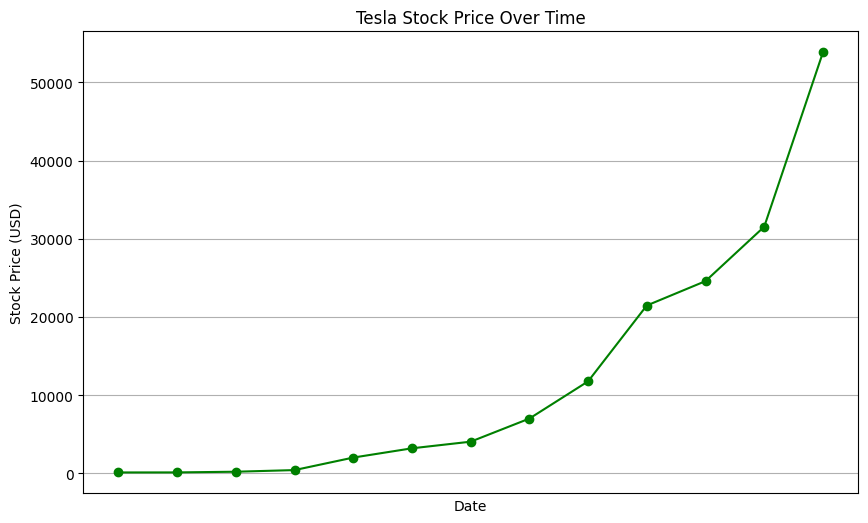

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Webscraping Tesla Stock Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'lxml')

# Step 2: Extract Tables using pandas
tables = pd.read_html(str(soup))

# Step 3: Identify the Tesla stock data table (assuming it's table 0)
tesla_data = tables[0]
tesla_data.columns = ['Date', 'Close']

# Step 4: Clean Data - Remove any commas or currency symbols if present
tesla_data['Close'] = tesla_data['Close'].str.replace('[\$,]', '', regex=True).astype(float)

# Step 5: Convert Date column to datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Step 6: Define the make_graph function
def make_graph(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], marker='o', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.show()

# Step 7: Call the make_graph function with Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")


C:\Users\USER\AppData\Local\Temp\ipykernel_14956\884343742.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


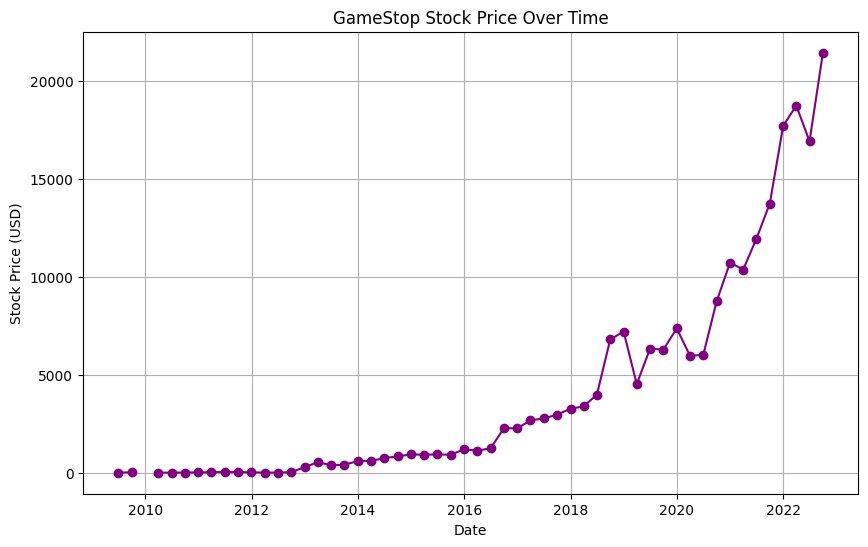

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Webscraping GME Stock Data from the provided URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'lxml')

# Step 2: Extract Tables using pandas
tables = pd.read_html(str(soup))

# Step 3: Identify the GME stock data table (assuming it's table 1)
gme_data = tables[1]
gme_data.columns = ['Date', 'Close']

# Step 4: Clean Data - Remove any commas or currency symbols
gme_data['Close'] = gme_data['Close'].str.replace('[\$,]', '', regex=True).astype(float)

# Step 5: Convert Date column to datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Step 6: Define the make_graph function
def make_graph(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], marker='o', color='purple')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.show()

# Step 7: Call the make_graph function with GME stock data
make_graph(gme_data, "GameStop Stock Price Over Time")
